# Chroma Vector Database Tutorial

빠른 이미지 검색을 위한 벡터 데이터베이스 튜토리얼

In [12]:
# 사용 패키지: 크로마, 트랜스포머 (이미지 벡터화)
!pip install -q chromadb transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.7 MB/s eta 0:

## Dataset

Food-11 데이터셋 중 evaluation 데이터에서 11가지 타입별 음식사진 10장씩 가져옴

https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

In [13]:
!wget -q https://github.com/kairess/toy-datasets/raw/master/Food-11.zip
!unzip -q Food-11.zip

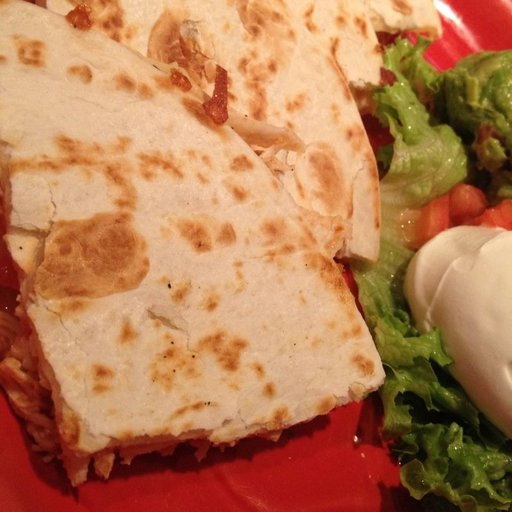

In [14]:
from PIL import Image

img = Image.open("test/Bread/0.jpg")
# 미리보기
img

## Image Vectorizer 모델 로드

ViT-DINO

https://huggingface.co/facebook/dino-vits16

In [15]:
from transformers import ViTFeatureExtractor, ViTModel

feature_extractor = ViTFeatureExtractor.from_pretrained('facebook/dino-vits16')
model = ViTModel.from_pretrained('facebook/dino-vits16').to("cuda")

print("Models loaded!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/86.7M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Models loaded!


## 임베딩
앞에 이미지를 임베딩화


In [16]:
# feature extractor
img_tensor = feature_extractor(images=img, return_tensors="pt").to("cuda")
outputs = model(**img_tensor)

# 최종임베딩 벡터 : pooler_outout
embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()

embedding

array([-1.41180813e-01,  9.93590534e-01,  9.69037712e-01,  7.43458033e-01,
       -9.67495978e-01, -4.69817758e-01, -9.22005475e-01, -9.14901137e-01,
        6.12257540e-01,  1.21128485e-01, -9.66104448e-01, -9.70146418e-01,
       -8.96529555e-01, -5.12934864e-01,  8.62257123e-01, -7.21060753e-01,
       -9.72975254e-01, -9.51143384e-01,  9.20605540e-01, -4.90511000e-01,
       -9.94156301e-01, -7.65262187e-01,  9.35478568e-01,  9.96919870e-01,
       -1.34603232e-01,  5.77753067e-01,  2.32924566e-01,  9.44674492e-01,
       -9.21233833e-01,  4.75943536e-01, -8.83295119e-01,  8.33354652e-01,
       -7.75154054e-01,  6.88228965e-01, -9.95249748e-01, -6.44722700e-01,
       -9.96872485e-01, -8.66706431e-01, -3.22761893e-01, -2.77570695e-01,
        2.57289410e-01,  9.59528089e-01,  8.64719987e-01,  1.98534697e-01,
       -4.79268283e-01,  9.52470064e-01,  9.48386908e-01, -2.87586957e-01,
       -9.64694992e-02, -7.71466613e-01, -1.25940340e-02, -2.27642059e-02,
       -2.26369962e-01,  

In [17]:
embedding.shape
# 385차원의 벡터로 변환됨

(384,)

## Chroma DB 시작

https://www.trychroma.com

In [18]:
import chromadb

client = chromadb.Client()

# foods라는 데이터 collection을 만들어줌 ( 관계형 db에서는 테이블)
collection = client.create_collection("foods")

## 모든 이미지 벡터화

In [19]:
from glob import glob

# test폴더 아래 전체 이미지
img_list = sorted(glob("test/*/*.jpg"))

len(img_list)

110

In [20]:
from tqdm import tqdm

embeddings = []
metadatas = []
ids = []

# 모든 이미지 벡터화
for i, img_path in enumerate(tqdm(img_list)):
    img = Image.open(img_path)
    cls = img_path.split("/")[1]

    img_tensor = feature_extractor(images=img, return_tensors="pt").to("cuda")
    outputs = model(**img_tensor)

    embedding = outputs.pooler_output.detach().cpu().numpy().squeeze().tolist()

    embeddings.append(embedding)

    metadatas.append({
        "uri": img_path,
        "name": cls
    })

    ids.append(str(i))

print("Done!")

100%|██████████| 110/110 [00:01<00:00, 63.03it/s]

Done!


## 임베딩을 데이터베이스에 저장

In [21]:
# 벡터화된 임베딩을 앞에 만들었던 collection 에 저장
# 임베딩, 메타데이터, 아이디
collection.add(
    embeddings=embeddings,
    metadatas=metadatas,
    ids=ids,
)

## Test1

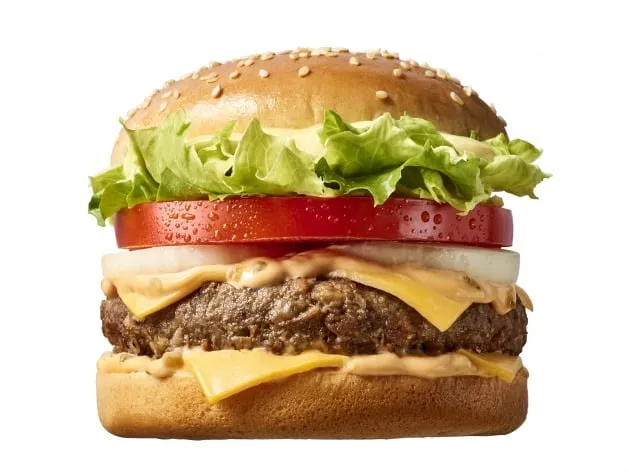

In [22]:
import requests

test_img = Image.open(requests.get("https://i.ibb.co/7Ksr5mw/yNp6qTS.png", stream=True).raw).convert("RGB")

test_img

In [23]:
test_img_tensor = feature_extractor(images=test_img, return_tensors="pt").to("cuda")
test_outputs = model(**test_img_tensor)

test_embedding = test_outputs.pooler_output.detach().cpu().numpy().squeeze().tolist()

len(test_embedding)

384

In [24]:
# 쿼리 작성
query_result = collection.query(
    query_embeddings=[test_embedding],
    # 몇개의 가까운 결과를 가져올지
    n_results=3,
)

query_result

{'ids': [['8', '2', '30']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'uris': None,
 'data': None,
 'metadatas': [[{'name': 'Bread', 'uri': 'test/Bread/8.jpg'},
   {'name': 'Bread', 'uri': 'test/Bread/2.jpg'},
   {'name': 'Egg', 'uri': 'test/Egg/0.jpg'}]],
 'distances': [[143.5589599609375, 281.5667724609375, 302.8837890625]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

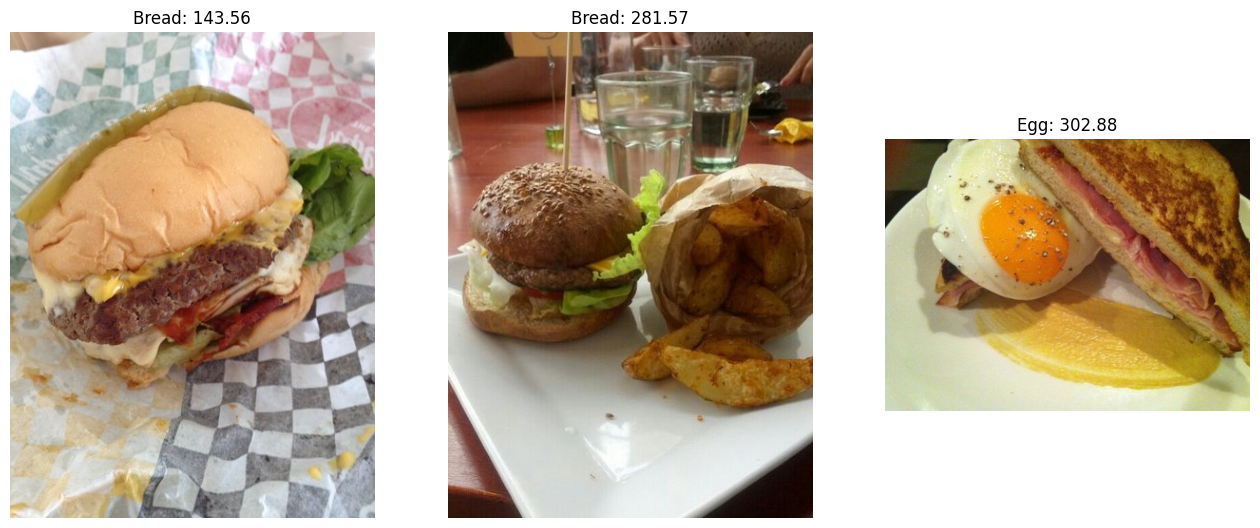

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 10))

for i, metadata in enumerate(query_result["metadatas"][0]):
    distance = query_result["distances"][0][i]

    axes[i].imshow(Image.open(metadata["uri"]))
    axes[i].set_title(f"{metadata['name']}: {distance:.2f}")
    axes[i].axis("off")

## 테스트를 위한 함수화

In [26]:
def query(img_url, n_results=3):
    test_img = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

    test_img_tensor = feature_extractor(images=test_img, return_tensors="pt").to("cuda")
    test_outputs = model(**test_img_tensor)

    test_embedding = test_outputs.pooler_output.detach().cpu().numpy().squeeze().tolist()

    query_result = collection.query(
        query_embeddings=[test_embedding],
        n_results=n_results,
    )

    fig, axes = plt.subplots(1, 4, figsize=(16, 10))

    axes[0].imshow(test_img)
    axes[0].set_title("Query")
    axes[0].axis("off")

    for i, metadata in enumerate(query_result["metadatas"][0]):
        distance = query_result["distances"][0][i]

        axes[i+1].imshow(Image.open(metadata["uri"]))
        axes[i+1].set_title(f"{metadata['name']}: {distance:.2f}")
        axes[i+1].axis("off")

    return query_result

## Test2

{'ids': [['47', '58', '0']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'uris': None,
 'data': None,
 'metadatas': [[{'name': 'Fried food', 'uri': 'test/Fried food/7.jpg'},
   {'name': 'Meat', 'uri': 'test/Meat/8.jpg'},
   {'name': 'Bread', 'uri': 'test/Bread/0.jpg'}]],
 'distances': [[296.60809326171875, 300.3110046386719, 302.11065673828125]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

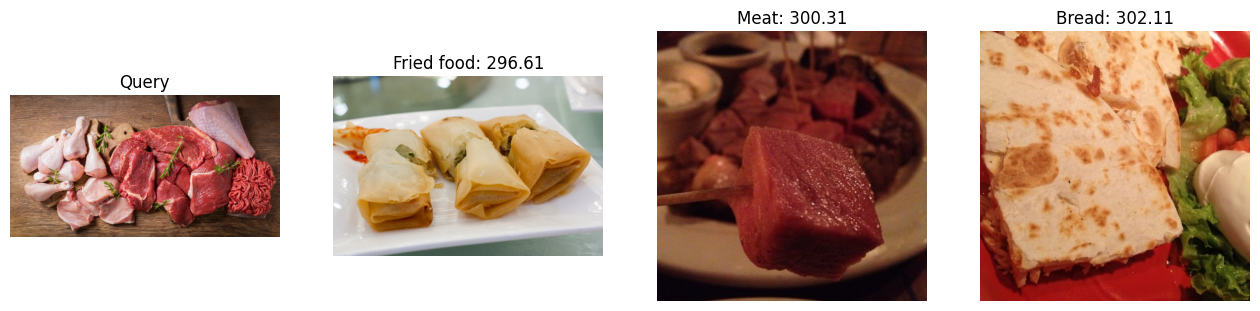

In [27]:
query("https://i.ibb.co/JmpXmvx/QCado9g.jpg")

{'ids': [['13', '14', '18']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'uris': None,
 'data': None,
 'metadatas': [[{'name': 'Dairy product', 'uri': 'test/Dairy product/3.jpg'},
   {'name': 'Dairy product', 'uri': 'test/Dairy product/4.jpg'},
   {'name': 'Dairy product', 'uri': 'test/Dairy product/8.jpg'}]],
 'distances': [[201.89889526367188, 246.406005859375, 254.247802734375]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

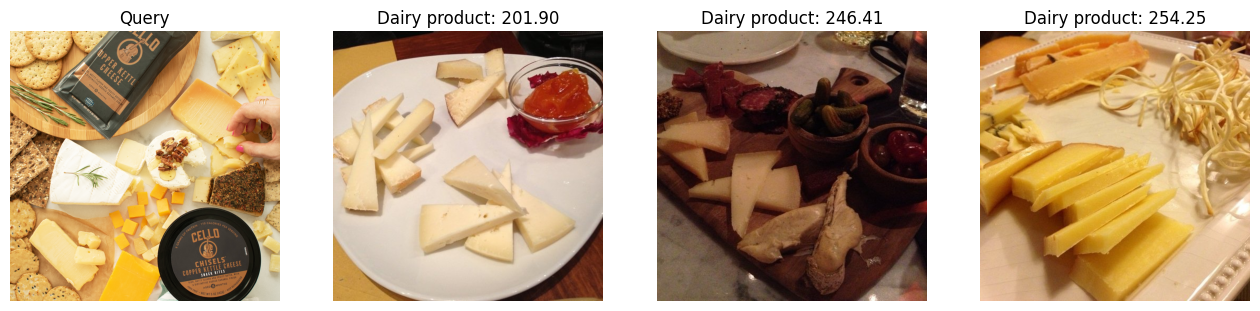

In [28]:
query("https://i.ibb.co/X5dkHGF/lf5C0LI.png")

{'ids': [['77', '75', '83']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'uris': None,
 'data': None,
 'metadatas': [[{'name': 'Rice', 'uri': 'test/Rice/7.jpg'},
   {'name': 'Rice', 'uri': 'test/Rice/5.jpg'},
   {'name': 'Seafood', 'uri': 'test/Seafood/3.jpg'}]],
 'distances': [[215.97097778320312, 228.32293701171875, 238.6156005859375]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

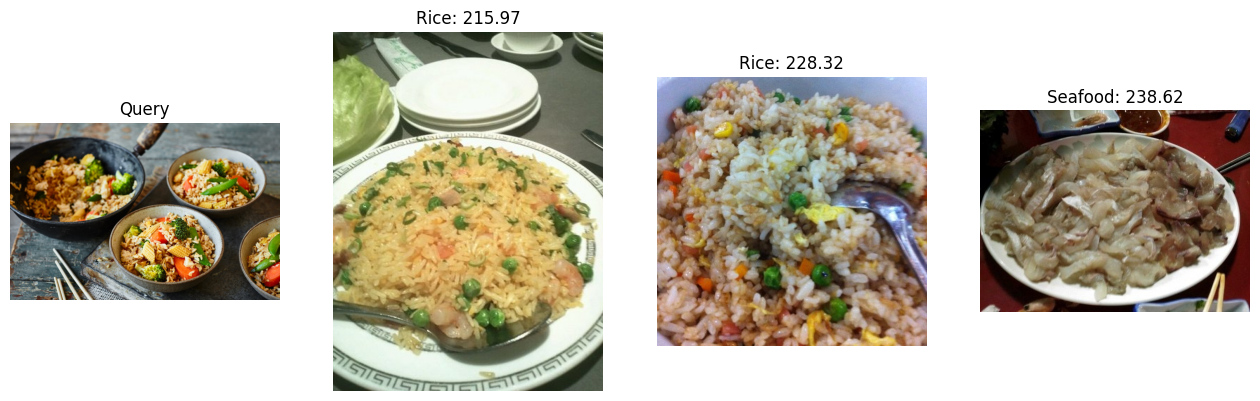

In [29]:
query("https://i.ibb.co/ZVx2Fn8/WlLv0i9.png")